In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/archive(7).zip")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
x=df.drop(['CUST_ID',  'BALANCE_FREQUENCY',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],axis=1)
x

,BALANCE,PURCHASES,PAYMENTS
0,40.900749,95.40,201.802084
1,3202.467416,0.00,4103.032597
2,2495.148862,773.17,622.066742
3,1666.670542,1499.00,0.000000
4,817.714335,16.00,678.334763
...,...,...,...
8945,28.493517,291.12,325.594462
8946,19.183215,300.00,275.861322
8947,23.398673,144.40,81.270775
8948,13.457564,0.00,52.549959


In [ ]:
from pandas.core.dtypes.cast import maybe_box_datetimelike
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(x)
  wcss.append(model.inertia_)
print (wcss)

[154633147572.6534, 101382467071.49803, 74139772211.08041, 58053989757.8396, 47820591357.15774, 41675048840.10535, 36088744465.077896, 31565265738.919575, 28493665705.936337, 26241976989.61911]


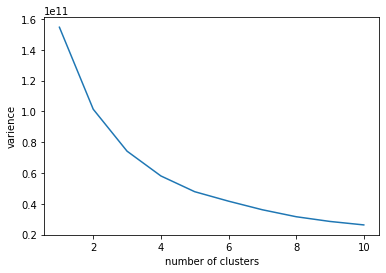

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel("number of clusters")
plt.ylabel("varience")
plt.show()

In [ ]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_model=model.fit_predict(x)
y_model

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
x['cluster']=y_model
x

,BALANCE,PURCHASES,PAYMENTS,cluster
0,40.900749,95.40,201.802084,1
1,3202.467416,0.00,4103.032597,0
2,2495.148862,773.17,622.066742,1
3,1666.670542,1499.00,0.000000,1
4,817.714335,16.00,678.334763,1
...,...,...,...,...
8945,28.493517,291.12,325.594462,1
8946,19.183215,300.00,275.861322,1
8947,23.398673,144.40,81.270775,1
8948,13.457564,0.00,52.549959,1
